<a href="https://colab.research.google.com/github/sud0x00/OCR-Legacy-Scripts/blob/main/SlidingWindow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Sliding Window implemented for Sharada OCR

In [9]:
!wget -O image.png https://www.shutterstock.com/image-photo/shanghai-skyscraper-scenery-wide-horizontal-260nw-1129778240.jpg

import random
import cv2
import matplotlib.pyplot as plt

def func1(crp_img):
    return random.uniform(75, 85)

def crop(image,x_start,x_end):
    if image is None:
        print("Error: Could not load image.")
        return
    height, width, _ = image.shape
    if x_start < 0 or x_end > width:
        print("Error: x coordinates are out of bounds.")
        return
    crop_img = image[:, x_start:x_end]
    return crop_img


windows = []

def main(_img):
    if _img is None:
        print("Error: Could not load image.")
        return

    height, width, _ = _img.shape
    x_start = 0
    x_end = height
    global windows
    while x_end <= width:
        crop_img = crop(_img, x_start, x_end)
        if crop_img is not None:
            val = func1(crop_img)
            if val > 80:
                windows.append(crop_img)
                x_start = x_end
                x_end = x_start + height
            else:
                x_start += int(0.1 * height)
                x_end += int(0.1 * height)
        else:
            break

    return windows

img_ = cv2.imread("/content/image.png")
windows = main(img_)

--2023-08-13 09:45:40--  https://www.shutterstock.com/image-photo/shanghai-skyscraper-scenery-wide-horizontal-260nw-1129778240.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 18.67.76.112, 18.67.76.87, 18.67.76.121, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|18.67.76.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39676 (39K) [image/jpeg]
Saving to: ‘image.png’

image.png           100%[===================>]  38.75K  --.-KB/s    in 0.002s  

2023-08-13 09:45:40 (18.9 MB/s) - ‘image.png’ saved [39676/39676]



In [10]:
len(windows)

2

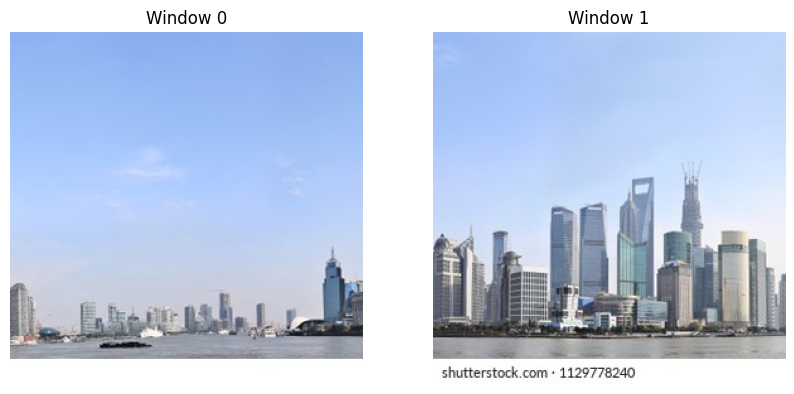

In [11]:
# Display the cropped images using pyplot
plt.figure(figsize=(10, 6))
for i, window in enumerate(windows):
    plt.subplot(1, len(windows), i+1)
    plt.imshow(cv2.cvtColor(window, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Window {i}")
plt.show()